# Pictures DataFrame Exploration  
In this notebook, I will provide a quick exploration of the data in the *picture_triplets* file.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/RecSys_206894495'

Mounted at /content/drive


In [3]:
!pip install pyarrow

import warnings
warnings.filterwarnings('ignore')

#Import libreirs
import pandas as pd
import numpy as np
import re

#Visulizetion
import seaborn as sns
import matplotlib.pyplot as plt

#Garbage collector
import gc

#Random
import random
#Set random seed
RSEED = 10
random.seed(RSEED)

In [ ]:
picture_triplets=pd.read_parquet(path+'/archive/data/picture_triplets.parquet',engine='pyarrow')
picture_triplets.head()

,picture.id,outfit.id,displayOrder,file_name
0,picture.0000cdba64314d84a49ed1c266589cc0,outfit.794483397da8425a813301eecf9828c6,0,0000cdba64314d84a49ed1c266589cc0.jpg
1,picture.00058abb53434872ae9bb4270ae21f8e,outfit.98f32aaf08bc4ff09c44e6e11e9199bc,2,00058abb53434872ae9bb4270ae21f8e.jpg
2,picture.00063f52c36d43ada95da45f819b30b4,outfit.9fd1c42c3db543c5b6e53b0db1ee8c0f,3,00063f52c36d43ada95da45f819b30b4.jpg
3,picture.0008443461814f5c988f123718bbd20e,outfit.a7539783b6e94591bdf4e10339afc1d7,3,0008443461814f5c988f123718bbd20e.jpg
4,picture.000a5db3362049aebcc1eb2bf7bde95f,outfit.745fa2bc8156478bac6c0f7d46dadbda,1,000a5db3362049aebcc1eb2bf7bde95f.jpg


In [ ]:
picture_triplets.shape

(50193, 4)

In [ ]:
picture_triplets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50193 entries, 0 to 50192
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   picture.id    50193 non-null  object
 1   outfit.id     50193 non-null  object
 2   displayOrder  50193 non-null  int64 
 3   file_name     50193 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [ ]:
picture_triplets['outfit.id'].nunique()

15157

In [ ]:
# Group by outfit.id and count the number of pictures
outfit_picture_count = picture_triplets.groupby('outfit.id')['picture.id'].count()

In [ ]:
# Calculate the statistics
mean_count = outfit_picture_count.mean()
std_count = outfit_picture_count.std()
min_count = outfit_picture_count.min()
median_count = outfit_picture_count.median()
max_count = outfit_picture_count.max()

# Display the results
print(f"Mean: {mean_count}")
print(f"Standard Deviation: {std_count}")
print(f"Minimum: {min_count}")
print(f"Median: {median_count}")
print(f"Maximum: {max_count}")

Mean: 3.311539222801346
Standard Deviation: 1.938090901897477
Minimum: 1
Median: 3.0
Maximum: 28


In [ ]:
# Filter outfits with picture count above one standard deviation
above_std_outfits = outfit_picture_count[outfit_picture_count > (mean_count + std_count)]

# Display the results
print("Number of Outfits with picture count above one standard deviations:"+ str(len(above_std_outfits)))
print(len(above_std_outfits)/picture_triplets['outfit.id'].nunique())

Number of Outfits with picture count above one standard deviations:1782
0.11756943986276967


In [ ]:
# Filter outfits with picture count above one standard deviation
above_std_outfits = outfit_picture_count[outfit_picture_count > (mean_count + 2*std_count)]

# Display the results
print("Number of Outfits with picture count above two standard deviations:"+ str(len(above_std_outfits)))
print(len(above_std_outfits)/picture_triplets['outfit.id'].nunique())

Number of Outfits with picture count above two standard deviations:446
0.029425348024015308


In [ ]:
# Filter outfits with picture count above one standard deviation
above_std_outfits = outfit_picture_count[outfit_picture_count > (mean_count + 3*std_count)]

# Display the results
print("Number of Outfits with picture count above three standard deviations:"+ str(len(above_std_outfits)))
print(len(above_std_outfits)/picture_triplets['outfit.id'].nunique())

Number of Outfits with picture count above three standard deviations:177
0.011677772646302039


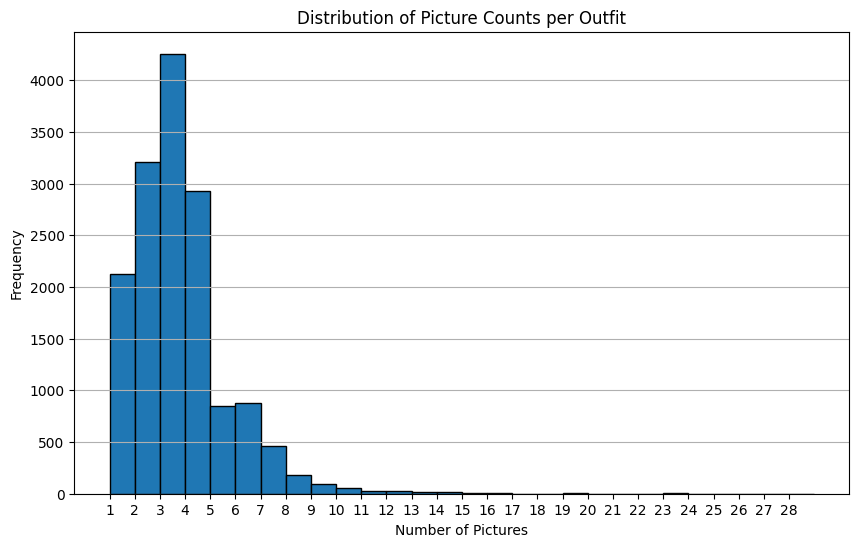

In [ ]:
# Plot the distribution
plt.figure(figsize=(10,6))
plt.hist(outfit_picture_count, bins=range(1, outfit_picture_count.max() + 2), edgecolor='black')
plt.title('Distribution of Picture Counts per Outfit')
plt.xlabel('Number of Pictures')
plt.ylabel('Frequency')
plt.xticks(range(1, outfit_picture_count.max() + 1))
plt.grid(axis='y')

# Show the plot
plt.show()

In [5]:
#to see how one rendom embedding look like

data = np.load(path+'/archive/embeddings/EfficientNet_V2_L_final/picture.fff7482dc5014cfb8fd353b85d1931f3.npy')

In [6]:
data

array([-0.0979 , -0.07794, -0.10205, ...,  1.541  ,  0.1277 , -0.1365 ],
      dtype=float16)